# $(g-2)_\tau$ with ALPs

1911.06579

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fa = 1000
mtau = 1.77686
max_atau = (8*np.pi/3)**0.5*fa/(2*mtau)

In [3]:
max_atau

814.4718824873852

In [4]:
def h1(x):
    return 1 + 2*x - (x-1) * x*np.log(x)+2*x*(x-3)*(x/(x-4))**0.5*np.log((x**0.5+(x-4)**0.5)/2)

In [5]:
def Delta_atau(atau, ma):
    return - mtau**2/(4*np.pi**2*fa**2)*atau**2*h1(ma**2/mtau**2)

In [24]:
x_atau = np.power(10, np.linspace(-1, np.log10(max_atau), 50))

In [25]:
y_m0 = [Delta_atau(atau, 1e-8) for atau in x_atau]
y_m1GeV = [Delta_atau(atau, 1) for atau in x_atau]
y_m10GeV = [Delta_atau(atau, 10) for atau in x_atau]

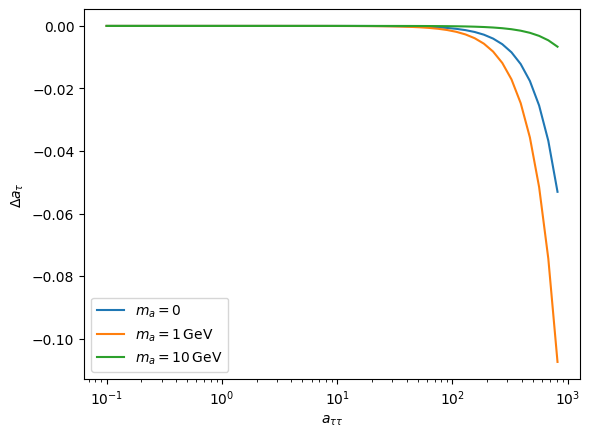

In [27]:
plt.semilogx(x_atau, y_m0, label = r"$m_a = 0$")
plt.semilogx(x_atau, y_m1GeV, label = r"$m_a = 1\,\mathrm{GeV}$")
plt.semilogx(x_atau, y_m10GeV, label = r"$m_a = 10\,\mathrm{GeV}$")
plt.xlabel(r"$a_{\tau\tau}$")
plt.ylabel(r"$\Delta a_\tau$")
plt.legend()
plt.show()


In [6]:
x_ma = np.power(10, np.linspace(np.log10(2*mtau), 2, 50))

In [7]:
y_a1 = [Delta_atau(0.8, ma) for ma in x_ma]
y_a10 = [Delta_atau(8, ma) for ma in x_ma]
y_a100 = [Delta_atau(80, ma) for ma in x_ma]
y_a1000 = [Delta_atau(800, ma) for ma in x_ma]

/tmp/ipykernel_35009/2417624288.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 + 2*x - (x-1) * x*np.log(x)+2*x*(x-3)*(x/(x-4))**0.5*np.log((x**0.5+(x-4)**0.5)/2)
/tmp/ipykernel_35009/2417624288.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return 1 + 2*x - (x-1) * x*np.log(x)+2*x*(x-3)*(x/(x-4))**0.5*np.log((x**0.5+(x-4)**0.5)/2)


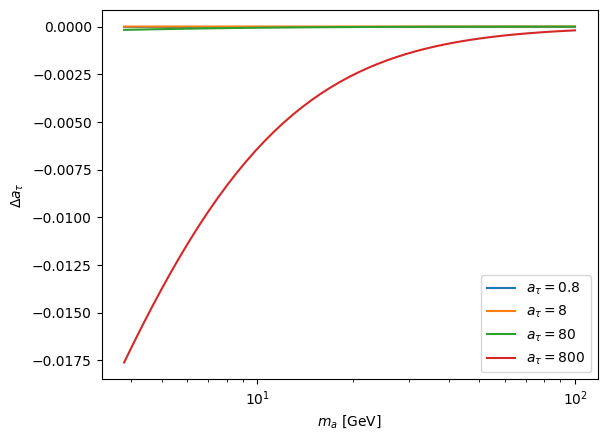

In [10]:
plt.semilogx(x_ma, y_a1, label=r"$a_\tau = 0.8$")
plt.semilogx(x_ma, y_a10, label=r"$a_\tau = 8$")
plt.semilogx(x_ma, y_a100, label=r"$a_\tau = 80$")
plt.semilogx(x_ma, y_a1000, label=r"$a_\tau = 800$")
plt.xlabel(r"$m_a$ [GeV]")
plt.ylabel(r"$\Delta a_\tau$")
plt.legend()
plt.show()